# Basketball Betting

## Project Overview

This project aims to leverage machine learning techniques to predict NBA game outcomes and scores, with a particular focus on enhancing sports betting strategies. By analyzing detailed player performance statistics and game results, we develop models that can predict whether the home team will win or lose, as well as the exact final score of the game. Our approach uses Random Forest classifiers and regressors to capture the complex interactions between player performances and game outcomes. The ultimate goal is to provide accurate and actionable insights for basketball betting enthusiasts and professionals.

The project is structured into several key steps, including data collection, preprocessing, feature extraction, model training, and evaluation. We also implement a user-friendly interface that allows users to input player names and receive predictions on game outcomes and scores. This comprehensive analysis and modeling effort showcases the power of machine learning in the realm of sports analytics and betting.



### Importing Libraries
We start by importing the necessary libraries for our project. These include:
- `pandas` for data manipulation and analysis,
- `tqdm` for progress bars,
- `numpy` for numerical operations,
- `sklearn` for machine learning models,
- `matplotlib` and `seaborn` for data visualization.

In [22]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import copy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

### Exploratory Data Analysis

We load the game data from a CSV file into a DataFrame. This dataset contains information about various NBA games, including the scores and other game-related details. Displaying the first few rows helps us understand the structure of the data.

In [23]:
games_df = pd.read_csv('games.csv')
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


To facilitate numerical operations, we convert the SEASON column from a string to an integer type. We calculate the average points scored by home and away teams for each season. This helps us identify trends and patterns in scoring over different seasons. We then plot this data using line plots to visualize the changes over time.

/Users/atirumalai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/atirumalai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/atirumalai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/atirumalai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

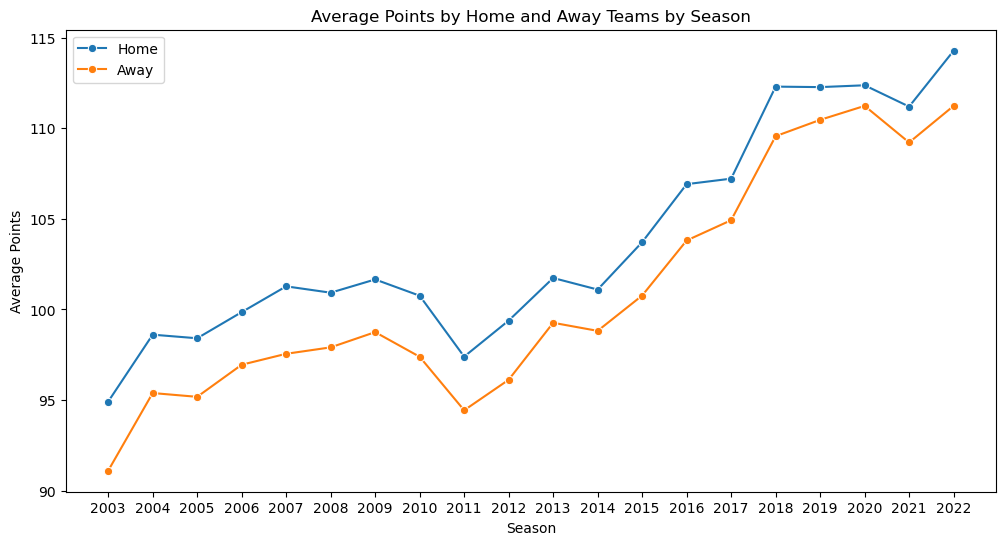

In [24]:
# Convert SEASON to integer
games_df['SEASON'] = games_df['SEASON'].astype(int)

# Calculate the average points by home and away teams by season
avg_points_by_season = games_df.groupby('SEASON')[['PTS_home', 'PTS_away']].mean()

# Plot the average points by home and away teams by season
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_points_by_season.reset_index(), x='SEASON', y='PTS_home', marker='o', label='Home')
sns.lineplot(data=avg_points_by_season.reset_index(), x='SEASON', y='PTS_away', marker='o', label='Away')
plt.title('Average Points by Home and Away Teams by Season')
plt.xlabel('Season')
plt.ylabel('Average Points')
plt.xticks(avg_points_by_season.index)  # Ensure x-axis ticks are integers
plt.legend()
plt.show()


The line graph above illustrates the average points scored by home and away teams in NBA games from the 2002-2003 season to the 2021-2022 season. Several key trends and observations can be made from this data:

1. **Overall Increase in Scoring**:
   - Both home and away teams have seen a notable increase in average points scored per game over the analyzed seasons. This trend reflects changes in the style of play in the NBA, which has increasingly favored faster-paced, higher-scoring games.

2. **Home Court Advantage**:
   - Throughout the entire period, home teams consistently scored more points on average than away teams. This phenomenon, known as "home court advantage," is well-documented in sports and can be attributed to factors such as familiar surroundings, supportive fans, and reduced travel fatigue.

3. **Seasonal Variations**:
   - There are fluctuations in scoring trends across different seasons. Notable dips can be observed in the 2011-2012 season, which coincides with a lockout that shortened the season and could have impacted player performance and game dynamics.
   - A significant increase in scoring is observed starting around the 2016-2017 season, aligning with strategic shifts in the league, such as the emphasis on three-point shooting and offensive efficiency.

4. **Recent Highs**:
   - The last few seasons (2019-2022) show the highest average points per game for both home and away teams, peaking in the 2021-2022 season. This peak could be due to continued strategic evolution in the game and rule changes favoring offensive play.

5. **Consistent Home Advantage**:
   - The gap between home and away teams' average points remains fairly consistent throughout the years, indicating that while both have improved their scoring abilities, the relative advantage of playing at home has persisted.


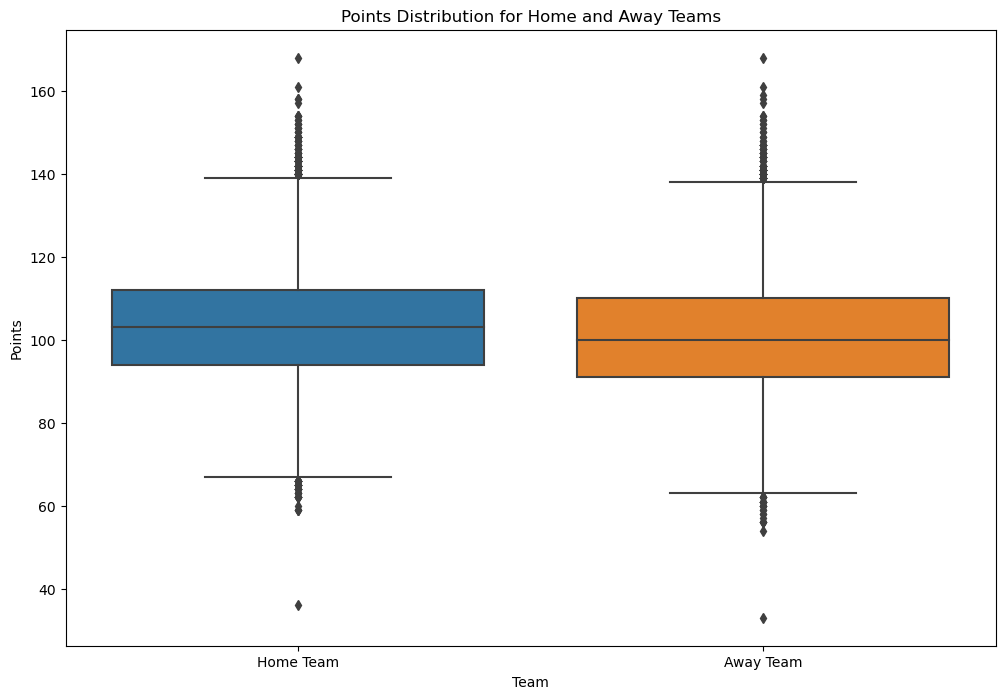

In [25]:
# Plot box plots of points distribution for home and away teams
plt.figure(figsize=(12, 8))
sns.boxplot(data=games_df[['PTS_home', 'PTS_away']])
plt.title('Points Distribution for Home and Away Teams')
plt.xlabel('Team')
plt.ylabel('Points')
plt.xticks([0, 1], ['Home Team', 'Away Team'])
plt.show()


The box plot above provides a visual representation of the distribution of points scored by home and away teams in NBA games. Several key observations can be made from this plot:

1. **Central Tendency**:
   - The median points scored by home teams is slightly higher than that of away teams, as indicated by the central line in each box. This reaffirms the home court advantage observed in the previous analysis.
   
2. **Interquartile Range (IQR)**:
   - The interquartile range (IQR), which represents the middle 50% of the data, is similar for both home and away teams. This suggests that the typical spread of points scored in games is comparable for both groups.
   
3. **Outliers**:
   - Both home and away teams have outliers on the high and low ends. There are several instances where teams scored significantly more or fewer points than usual. The presence of these outliers highlights the variability and unpredictability inherent in basketball games.
   - Notably, there are more high-end outliers for home teams, indicating that home teams are more likely to have exceptionally high-scoring games compared to away teams.
   
4. **Whiskers**:
   - The whiskers of the box plot extend to the minimum and maximum values within 1.5 times the IQR from the quartiles. For both home and away teams, the lower whisker reaches down to around 60 points, while the upper whisker reaches up to approximately 140 points for home teams and slightly lower for away teams.

5. **Overall Spread**:
   - The overall spread of points is broader for home teams, as evidenced by the longer whiskers and more outliers. This suggests that while home teams have a higher average and median score, their performance is also more variable compared to away teams.

We calculate the win rate of home teams for each season to analyze the home advantage trend. By plotting the win rate over seasons, we can see how consistently home teams have an advantage.

/Users/atirumalai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/atirumalai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


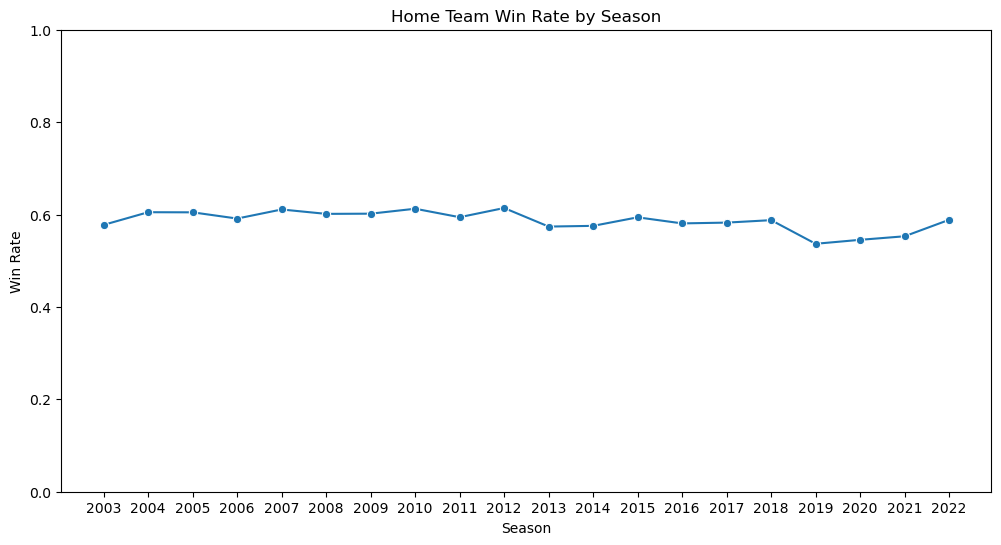

In [26]:
# Convert SEASON to integer
games_df['SEASON'] = games_df['SEASON'].astype(int)

# Calculate the win rate by season
win_rate_by_season = games_df.groupby('SEASON')['HOME_TEAM_WINS'].mean()

# Plot the home team win rate by season
plt.figure(figsize=(12, 6))
sns.lineplot(x=win_rate_by_season.index, y=win_rate_by_season.values, marker='o')
plt.title('Home Team Win Rate by Season')
plt.xlabel('Season')
plt.ylabel('Win Rate')
plt.ylim(0, 1)
plt.xticks(win_rate_by_season.index)  # Ensure x-axis ticks are integers
plt.show()



The line graph above depicts the win rate of home teams in NBA games from the 2002-2003 season to the 2021-2022 season. The win rate is calculated as the ratio of home team wins to the total number of games played each season. Here are the key observations and analysis from this graph:

1. **Consistent Home Advantage**:
   - Over the entire period, the home team win rate fluctuates around the 0.6 mark, indicating that home teams win approximately 60% of their games on average. This consistency underscores the well-known home court advantage in the NBA.

2. **Fluctuations in Win Rate**:
   - There are minor fluctuations in the win rate across seasons. The win rate dips slightly below 0.6 in some seasons, such as 2011-2012 and 2019-2020, while rising above 0.6 in others, such as 2012-2013 and 2021-2022.
   - These fluctuations could be influenced by various factors, including changes in team compositions, injuries to key players, and shifts in playing styles or strategies.

3. **Impact of External Factors**:
   - The 2011-2012 season saw a slight dip in the home team win rate, which could be attributed to the shortened season due to the lockout, affecting team dynamics and performance.
   - Similarly, the 2019-2020 season experienced a noticeable drop in win rate, potentially influenced by the COVID-19 pandemic, which disrupted the regular season and led to games being played in a bubble environment without traditional home court advantages.

4. **Recent Trends**:
   - In the last few seasons, there is a slight upward trend in the home team win rate, with the 2021-2022 season showing a return to around 0.6. This suggests a stabilization or recovery of the home court advantage post-pandemic disruptions.

5. **Historical Stability**:
   - Despite the fluctuations, the overall stability of the win rate around 0.6 highlights the persistent impact of playing at home. This stability reflects the advantages home teams typically enjoy, such as familiar playing conditions, supportive crowds, and reduced travel fatigue.

### Data Preprocessing

Now that we have understood the various trends and patterns in our data through exploratory data analysis, we are ready to proceed with the next step: data preprocessing. This step involves cleaning and preparing our data to ensure it is suitable for training our machine learning models. Proper preprocessing will help us address any inconsistencies, handle missing values, and transform the data into a format that can be efficiently used by our algorithms.


In [27]:
details_df = pd.read_csv('games_details.csv')
details_df.head()

/var/folders/y5/3b7y1ppj1dq4pv5pyd26ts0h0000gn/T/ipykernel_50207/1978113452.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  details_df = pd.read_csv('games_details.csv')


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


To focus our analysis on more recent data, we filter out games that occurred before the 2017 season. This reduces the size of our dataset and ensures that our models are trained on relevant and current data.

In [28]:
#For space considerations, we drop all games prior to 2017
drop_ids = [] 
for index, row in games_df.iterrows():
    year_str = row['GAME_DATE_EST']
    year = int(year_str[0:4])
    if(year < 2017):
        drop_ids.append(row['GAME_ID'])

games_df = games_df[~games_df['GAME_ID'].isin(drop_ids)]
details_df = details_df[~details_df['GAME_ID'].isin(drop_ids)]

games_df.reset_index(drop=True, inplace=True)
details_df.reset_index(drop=True, inplace=True)

We initialize a dictionary to store player statistics for each game they played. This structure will help us track individual player performances across multiple games.

In [29]:
num_rows = details_df.shape[0]
# Initialize the data structure
player_stats = {}


# Construct the data structure
for index, row in tqdm(details_df.iterrows(), total=num_rows, desc="Processing rows"):
    player_name = row['PLAYER_NAME']
    game_id = row['GAME_ID']
    player_statistics = row.drop(['PLAYER_NAME', 'GAME_ID', 'TEAM_ID', 'TEAM_CITY', 'PLAYER_ID', 'NICKNAME','START_POSITION','COMMENT','TEAM_ABBREVIATION'])
    if player_statistics.isnull().any():
        continue
    player_statistics = player_statistics.to_dict()
    if player_name not in player_stats:
        player_stats[player_name] = {}
    
    player_stats[player_name][game_id] = player_statistics

Processing rows: 100%|██████████| 208536/208536 [00:30<00:00, 6810.26it/s]


We create a dictionary to maintain a sorted list of game IDs for each player. This will make it easier to look up the previous three games for any player.

In [30]:
player_games_sorted = {}
for index, row in tqdm(details_df.iterrows(), total=num_rows, desc="Processing rows"):
    player_name = row['PLAYER_NAME']
    game_id = row['GAME_ID']

    if player_name not in player_games_sorted:
        player_games_sorted[player_name] = [game_id]
    else:
        player_games_sorted[player_name].append(game_id)
        player_games_sorted[player_name].sort()

Processing rows:   0%|          | 0/208536 [00:00<?, ?it/s]

Processing rows: 100%|██████████| 208536/208536 [00:04<00:00, 45160.97it/s]


We define a function to convert player statistics dictionary entries into numpy arrays. This conversion will facilitate numerical operations and model training.

In [31]:
def dict_entry_to_numpy(dict_entry):
    time_str = dict_entry['MIN']
    try:
        if ':' in time_str:
            minutes, seconds = map(int, time_str.split(':'))
            total_minutes = minutes * 60 + seconds
        else:
            total_minutes = float(time_str) * 60  # Assuming it's in minutes as a float
    except ValueError:
        total_minutes = 0.0  # Default to 0 if the format is incorrect or missing

    new_entry = dict_entry.copy()
    new_entry['MIN'] = total_minutes
    values_array = np.array(list(new_entry.values()))
    return values_array


We define a function to find the statistics for the past three games of a player. This function is crucial for creating input tensors that capture recent player performance.

In [32]:
# Function to find past three game IDs
def findPastThreeIDs(player_name, target_game=None):
    if player_name not in player_games_sorted:
        return np.zeros(20 * 3)  # Assuming each entry has 20 features and we need three entries
    foundarr = []
    for game_id in player_games_sorted[player_name]:
        if game_id == target_game:
            break
        try:
            foundarr.append(dict_entry_to_numpy(player_stats[player_name][game_id]))
        except KeyError:
            continue
    if len(foundarr) < 3:
        return np.concatenate([np.zeros(20)] * (3 - len(foundarr)) + foundarr)
    return np.concatenate(foundarr[-3:])

We demonstrate how to use the above function to get the tensor for a player and the three previous games before a specified game.

In [33]:
findPastThreeIDs("Romeo Langford", 22200477)

array([ 1.719e+03,  7.000e+00,  1.000e+01,  7.000e-01,  1.000e+00,
        2.000e+00,  5.000e-01,  4.000e+00,  4.000e+00,  1.000e+00,
        1.000e+00,  5.000e+00,  6.000e+00,  0.000e+00,  1.000e+00,
        1.000e+00,  2.000e+00,  3.000e+00,  1.900e+01, -3.000e+00,
        1.491e+03,  1.000e+00,  5.000e+00,  2.000e-01,  0.000e+00,
        2.000e+00,  0.000e+00,  1.000e+00,  2.000e+00,  5.000e-01,
        2.000e+00,  1.000e+00,  3.000e+00,  1.000e+00,  1.000e+00,
        1.000e+00,  0.000e+00,  1.000e+00,  3.000e+00, -1.200e+01,
        1.154e+03,  2.000e+00,  2.000e+00,  1.000e+00,  1.000e+00,
        1.000e+00,  1.000e+00,  1.000e+00,  2.000e+00,  5.000e-01,
        0.000e+00,  1.000e+00,  1.000e+00,  1.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  1.000e+00,  6.000e+00,  3.000e+00])

We define a function to get the tensor for a specific game by combining the statistics of starting players. This tensor serves as the input for our machine learning models.

In [34]:
# Function to get tensor from game ID
def getTensorFromID(id, game_details_df):
    filtered_df = game_details_df[(game_details_df['GAME_ID'] == id) & (game_details_df['START_POSITION'].notna())]
    tensor = np.array([], dtype=float)
    for index, row in filtered_df.iterrows():
        player_tensor = findPastThreeIDs(row['PLAYER_NAME'], id)
        tensor = np.concatenate((tensor, player_tensor))
    return tensor 

Example usage of the above function. This allows us to get an input tensor for a specfied game. So, to train on data, simply run this function to get all input points on the games you want to train on. 

In [35]:
getTensorFromID(22200477, details_df)

array([ 1.719e+03,  7.000e+00,  1.000e+01,  7.000e-01,  1.000e+00,
        2.000e+00,  5.000e-01,  4.000e+00,  4.000e+00,  1.000e+00,
        1.000e+00,  5.000e+00,  6.000e+00,  0.000e+00,  1.000e+00,
        1.000e+00,  2.000e+00,  3.000e+00,  1.900e+01, -3.000e+00,
        1.491e+03,  1.000e+00,  5.000e+00,  2.000e-01,  0.000e+00,
        2.000e+00,  0.000e+00,  1.000e+00,  2.000e+00,  5.000e-01,
        2.000e+00,  1.000e+00,  3.000e+00,  1.000e+00,  1.000e+00,
        1.000e+00,  0.000e+00,  1.000e+00,  3.000e+00, -1.200e+01,
        1.154e+03,  2.000e+00,  2.000e+00,  1.000e+00,  1.000e+00,
        1.000e+00,  1.000e+00,  1.000e+00,  2.000e+00,  5.000e-01,
        0.000e+00,  1.000e+00,  1.000e+00,  1.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  1.000e+00,  6.000e+00,  3.000e+00,
        1.289e+03,  2.000e+00,  6.000e+00,  3.330e-01,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        1.000e+00,  4.000e+00,  5.000e+00,  3.000e+00,  0.000e

We prepare the training data by constructing input tensors for each game and corresponding labels for the classification and regression tasks. This involves iterating through each game and creating the necessary tensors and labels.

To ensure all tensors have consistent shapes, we pad them to the length of the longest tensor. This step is crucial for the models to process the input data correctly.

We split the data into training and testing sets for both classification and regression tasks. This allows us to evaluate our models on unseen data.

In [36]:
# Preparing training data
input_tensors = []
output_labels = []
output_scores = []

for index, row in tqdm(games_df.iterrows(), total=games_df.shape[0], desc="Preparing training data"):
    game_id = row['GAME_ID']
    home_team_wins = 1 if row['HOME_TEAM_WINS'] else 0
    home_team_score = row['PTS_home']
    away_team_score = row['PTS_away']
    
    tensor = getTensorFromID(game_id, details_df)
    input_tensors.append(tensor)
    output_labels.append(home_team_wins)
    output_scores.append([home_team_score, away_team_score])

# Determine the maximum tensor length
max_length = max(len(tensor) for tensor in input_tensors)

# Pad tensors to ensure consistent shape
def pad_tensor(tensor, max_length):
    padding = max(0, max_length - len(tensor))
    return np.pad(tensor, (0, padding), 'constant')

input_tensors = [pad_tensor(tensor, max_length) for tensor in input_tensors]

# Convert to numpy arrays
X = np.array(input_tensors)
y = np.array(output_labels)
y_scores = np.array(output_scores)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scores, X_test_scores, y_train_scores, y_test_scores = train_test_split(X, y_scores, test_size=0.2, random_state=42)

Preparing training data: 100%|██████████| 7984/7984 [01:26<00:00, 92.20it/s] 


Now that the data has been prepared, we can test out different architecutures

Logistic Regression Classifier

In this section, we will create a logistic regression classifier to classify the winning team given 2 input array of five players. The code above this cell is the data preprocessing pipeline, which filters out unnecessary features and creates helper functions to make input tensors based on player data. The code below defines a logistic regression classifier, normalizes the data, and uses a grid search approach to identify the best regularization hyperparameters.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

logistic_clf = LogisticRegression()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(logistic_clf, param_grid, cv=5, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Best parameters found:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.59
Test set accuracy: 0.59
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.26      0.37       730
           1       0.58      0.87      0.70       867

    accuracy                           0.59      1597
   macro avg       0.61      0.57      0.53      1597
weighted avg       0.61      0.59      0.55      1597

Confusion matrix:
 [[190 540]
 [109 758]]


We can see the results of training our model. Various metrics are shown above and below.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.593613024420789
Precision: 0.5839753466872111
Recall: 0.8742791234140715
F1 Score: 0.7002309468822171
ROC AUC: 0.5626250177750391


This function is used as the user input pipeline and utilizes the logistic regression model to make a prediction on the winning team

In [ ]:
def predict_game_outcome_log(home_team_players, away_team_players, scaler):
    max_players = 5
    
    if len(home_team_players) > max_players or len(away_team_players) > max_players:
        print("Error: More than 5 players entered on a team.")
        return None
    
    home_tensor = np.array([], dtype=float)
    away_tensor = np.array([], dtype=float)
    
    for player in home_team_players:
        if player not in player_stats:
            print(f"Error: Player {player} not found.")
            return None
        player_tensor = findPastThreeIDs(player, None)
        home_tensor = np.concatenate((home_tensor, player_tensor))
    
    for player in away_team_players:
        if player not in player_stats:
            print(f"Error: Player {player} not found.")
            return None
        player_tensor = findPastThreeIDs(player, None)
        # away_tensors.append(player_tensor)
        away_tensor = np.concatenate((away_tensor, player_tensor))
    
    while len(home_team_players) < max_players:
        home_tensor = np.concatenate((home_tensor, np.zeros(20 * 3)))
        home_team_players.append(None)
    
    while len(away_team_players) < max_players:
        away_tensor = np.concatenate((away_tensor, np.zeros(20 * 3)))
        away_team_players.append(None)  # To keep track of added empty tensors
    
    home_tensor = pad_tensor(home_tensor, max_length // 2)
    away_tensor = pad_tensor(away_tensor, max_length // 2)

    input_tensor = np.concatenate((home_tensor, away_tensor)).reshape(1, -1)

    input_tensor_scaled = scaler.transform(input_tensor)
    
    scores = best_model.predict_proba(input_tensor_scaled)[0]
    print(scores)

    home_team_score_prob = scores[0]
    away_team_score_prob = scores[1]
    
    if home_team_score_prob > away_team_score_prob:
        outcome = 1  # Home team wins
    else:
        outcome = 0  # Away team wins
    
    return outcome, home_team_score_prob, away_team_score_prob

home_team_input = input("Enter the names of the home team players separated by commas: ").split(',')
away_team_input = input("Enter the names of the away team players separated by commas: ").split(',')

home_team_input = [player.strip() for player in home_team_input]
away_team_input = [player.strip() for player in away_team_input]

outcome, home_team_prob, away_team_prob = predict_game_outcome_log(home_team_input, away_team_input, scaler)

if outcome is not None:
    print(f'Predicted Outcome: {"Home Team Wins" if outcome == 1 else "Away Team Wins"}')
    print(f'Home Team Win Probability: {home_team_prob:.2f}')
    print(f'Away Team Win Probability: {away_team_prob:.2f}')


Enter the names of the home team players separated by commas:  Trey Murphy III, Naji Marshall, Jonas Valanciunas,Herbert Jones, CJ McCollum 
Enter the names of the away team players separated by commas:  Stephen Curry, Klay Thompson, Draymond Green, Kevon Looney, Andrew Wiggins


[0.46258764 0.53741236]
Predicted Outcome: Away Team Wins
Home Team Win Probability: 0.46
Away Team Win Probability: 0.54


The cells below create figure to visual the accuracy, error, and ROC-AUC graph

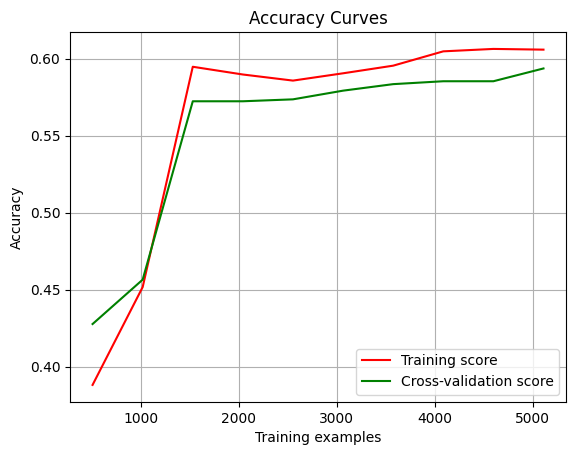

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

final_test_score = accuracy_score(y_test, best_model.predict(X_test_scaled))

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Accuracy Curves")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()
plt.plot(train_sizes, train_scores_mean,  color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")
plt.legend()
plt.show()

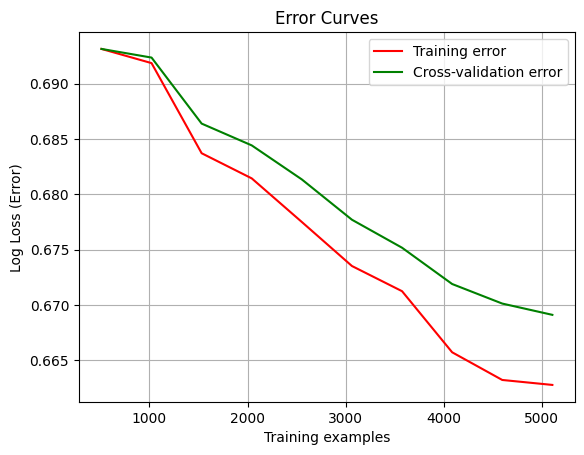

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, scoring='neg_log_loss',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_errors_mean = -np.mean(train_scores, axis=1)
train_errors_std = np.std(train_scores, axis=1)
test_errors_mean = -np.mean(test_scores, axis=1)
test_errors_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Error Curves")
plt.xlabel("Training examples")
plt.ylabel("Log Loss (Error)")
plt.grid()
plt.plot(train_sizes, train_errors_mean,  color="r", label="Training error")
plt.plot(train_sizes, test_errors_mean,  color="g", label="Cross-validation error")
plt.legend()
plt.show()

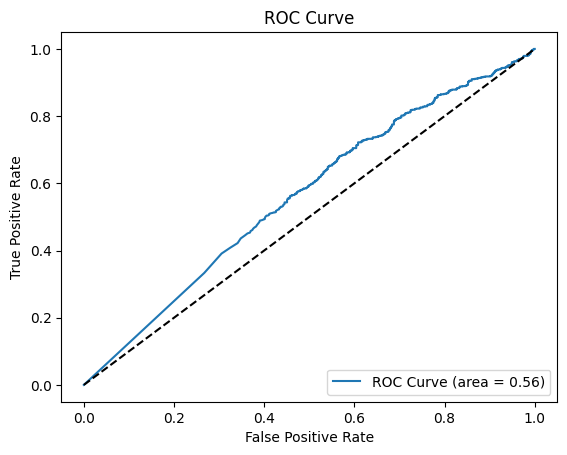

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# SVR Contributions Are Here:
The code work leading to this section is the same as the set used for random forest, and we implement the rest below using SVR. We define a grid of parameters to step through and use GridSearchCV to search through all of the the combincations. Then from there we want to train and test the two models, and store the best results for both. 

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#Parameter grid for SVR
param_grid = {'C': [0.1, 1, 10], 
              'gamma': ['scale', 'auto'], 
              'kernel': ['rbf', 'linear']}


#Training and Testing the Model

y_train_home_scores = y_train_scores[:, 0]
y_train_away_scores = y_train_scores[:, 1]
y_test_home_scores = y_test_scores[:, 0]
y_test_away_scores = y_test_scores[:, 1]

svr_home = SVR(max_iter=10000)
grid_svr_home = GridSearchCV(svr_home, param_grid, cv=5, scoring='neg_mean_squared_error', verbose = 2)
grid_svr_home.fit(X_train_scores, y_train_home_scores)

best_svr_home_params = grid_svr_home.best_params_
best_svr_home_score = grid_svr_home.best_score_

svr_away = SVR(max_iter=10000)
grid_svr_away = GridSearchCV(svr_away, param_grid, cv=5, scoring='neg_mean_squared_error', verbose = 2)
grid_svr_away.fit(X_train_scores, y_train_away_scores)

best_svr_away_params = grid_svr_away.best_params_
best_svr_away_score = grid_svr_away.best_score_

best_svr_home = grid_svr_home.best_estimator_
y_test_pred_home_scores = best_svr_home.predict(X_test_scores)
test_home_mse = mean_squared_error(y_test_home_scores, y_test_pred_home_scores)

best_svr_away = grid_svr_away.best_estimator_
y_test_pred_away_scores = best_svr_away.predict(X_test_scores)
test_away_mse = mean_squared_error(y_test_away_scores, y_test_pred_away_scores)


#Scoring Metrics

print(f'Test SVR Home Team Mean Squared Error with best params: {test_home_mse:.2f}')
print(f'Test SVR Away Team Mean Squared Error with best params: {test_away_mse:.2f}')

from sklearn.metrics import mean_absolute_error

test_home_mae = mean_absolute_error(y_test_home_scores, y_test_pred_home_scores)

test_away_mae = mean_absolute_error(y_test_away_scores, y_test_pred_away_scores)

print(f'Test SVR Home Team Mean Absolute Error with best params: {test_home_mae:.2f}')
print(f'Test SVR Away Team Mean Absolute Error with best params: {test_away_mae:.2f}')

from sklearn.metrics import r2_score

test_home_r2 = r2_score(y_test_home_scores, y_test_pred_home_scores)

test_away_r2 = r2_score(y_test_away_scores, y_test_pred_away_scores)

print(f'Test SVR Home Team R² score with best params: {test_home_r2:.2f}')
print(f'Test SVR Away Team R² score with best params: {test_away_r2:.2f}')




Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.9s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.9s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.9s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.7s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.7s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.8s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.9s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.7s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.7s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.6s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.4s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.4s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.3s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.7s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   6.6s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   6.5s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   1.7s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.4s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.6s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.4s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.4s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.3s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.8s
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.5s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.8s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.4s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.8s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.6s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.5s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.8s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.5s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   6.5s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   1.8s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   6.9s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   7.6s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.2s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.1s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   1.8s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.7s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.7s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.7s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.7s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   6.7s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.9s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.8s


/Users/rahulmohan/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   1.8s
Test SVR Home Team Mean Squared Error with best params: 158.56
Test SVR Away Team Mean Squared Error with best params: 153.54
Test SVR Home Team Mean Absolute Error with best params: 10.05
Test SVR Away Team Mean Absolute Error with best params: 9.96
Test SVR Home Team R² score with best params: 0.01
Test SVR Away Team R² score with best params: 0.00


# Same Function but modified for SVR

In [ ]:
def predict_game_outcome_and_score(home_team_players, away_team_players, home_model, away_model):
    max_players = 5  
    
    if len(home_team_players) > max_players or len(away_team_players) > max_players:
        print("Error: More than 5 players entered on a team.")
        return None, None
    
    home_tensor = np.array([], dtype=float)
    away_tensor = np.array([], dtype=float)
    
    for player in home_team_players:
        if player not in player_stats:
            print(f"Error: Player {player} not found.")
            return None, None
        home_tensor = np.concatenate((home_tensor, findPastThreeIDs(player, None)))
    
    for player in away_team_players:
        if player not in player_stats:
            print(f"Error: Player {player} not found.")
            return None, None
        away_tensor = np.concatenate((away_tensor, findPastThreeIDs(player, None)))
    
    while len(home_team_players) < max_players:
        home_tensor = np.concatenate((home_tensor, np.zeros(20 * 3)))
        home_team_players.append(None)  
    
    while len(away_team_players) < max_players:
        away_tensor = np.concatenate((away_tensor, np.zeros(20 * 3)))
        away_team_players.append(None)  
    
    home_tensor = pad_tensor(home_tensor, max_length // 2)
    away_tensor = pad_tensor(away_tensor, max_length // 2)
    
    input_tensor = np.concatenate((home_tensor, away_tensor)).reshape(1, -1)
    
    home_team_score = int(round(home_model.predict(input_tensor)[0]))
    away_team_score = int(round(away_model.predict(input_tensor)[0]))
    
    outcome = 1 if home_team_score > away_team_score else 0
    
    return outcome, (home_team_score, away_team_score)

home_team_input = input("Enter the names of the home team players separated by commas: ").split(',')
away_team_input = input("Enter the names of the away team players separated by commas: ").split(',')

home_team_input = [player.strip() for player in home_team_input]
away_team_input = [player.strip() for player in away_team_input]

# Predict outcome and scores
outcome, scores = predict_game_outcome_and_score(home_team_input, away_team_input, best_svr_home, best_svr_away)

if outcome is not None:
    print(f'Predicted Outcome: {"Home Team Wins" if outcome == 1 else "Away Team Wins"}')
    print(f'Predicted Scores: Home Team {scores[0]} - Away Team {scores[1]}')
    
# For example, you can input this in the popup that comes when you run this cell:
# Bojan Bogdanovic, Austin Rivers, Mason Plumlee, Andre Drummond, Cedi Osman
# Kevon Harris, Terry Rozier, Udonis Haslem, Kelly Olynyk, Devin Booker




Predicted Outcome: Home Team Wins
Predicted Scores: Home Team 109 - Away Team 108


# Some Metrics for Evaluation and Visualization

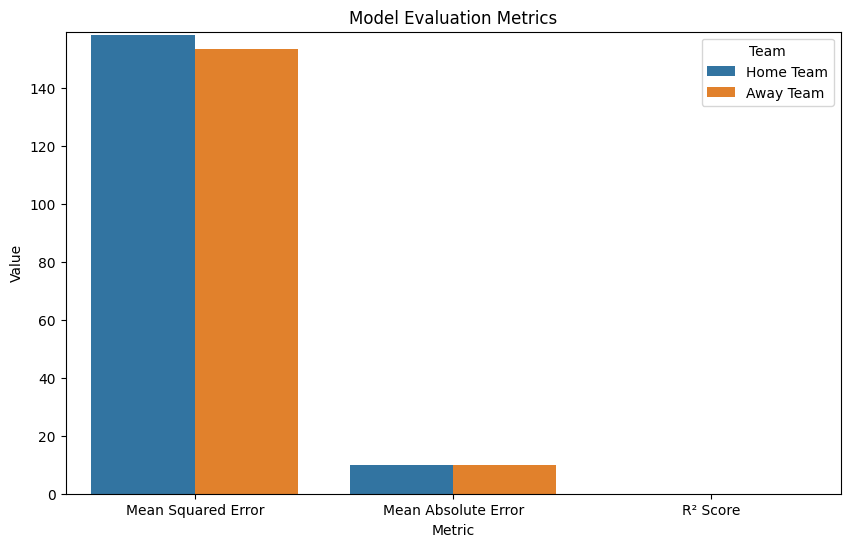

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = {
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R² Score'],
    'Home Team': [test_home_mse, test_home_mae, test_home_r2],
    'Away Team': [test_away_mse, test_away_mae, test_away_r2]
}

import pandas as pd
metrics_df = pd.DataFrame(metrics)

metrics_melted = pd.melt(metrics_df, id_vars='Metric', var_name='Team', value_name='Value')


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Team', data=metrics_melted)
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, max(metrics_melted['Value']) + 1) 
plt.show()


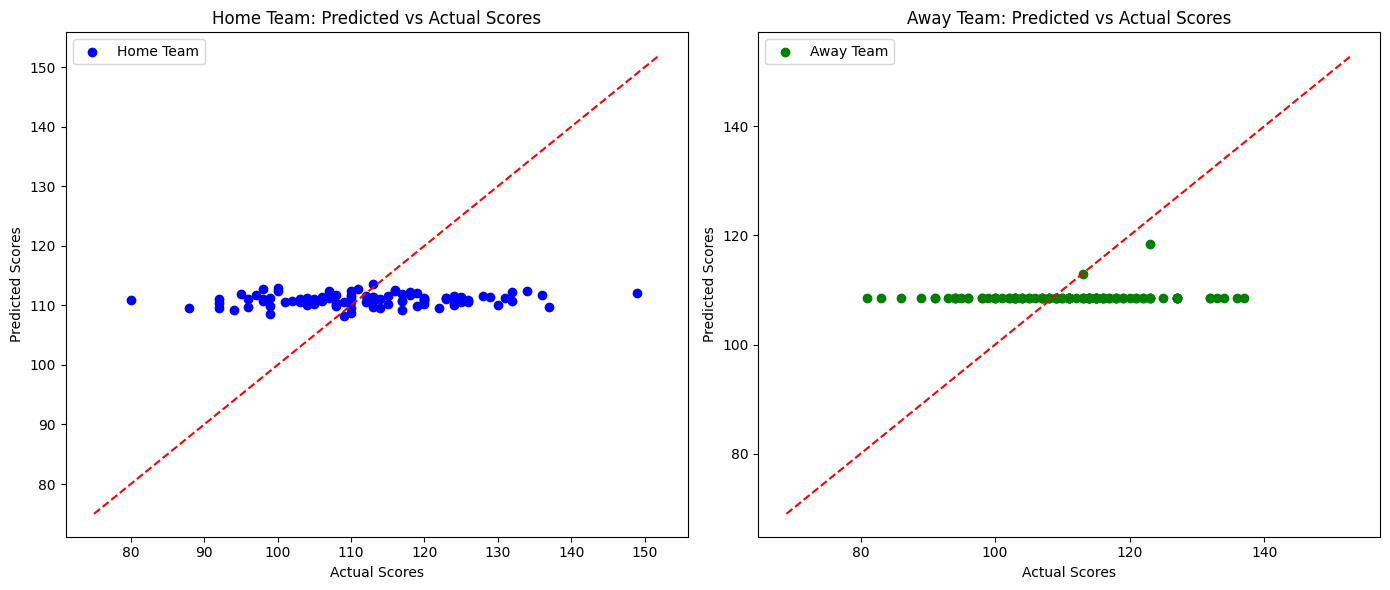

In [ ]:
import numpy as np

sample_size = 100  
indices = np.random.choice(range(len(y_test_home_scores)), size=sample_size, replace=False)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_home_scores[indices], y_test_pred_home_scores[indices], color='blue', label='Home Team')
plt.plot([min(y_test_home_scores), max(y_test_home_scores)], [min(y_test_home_scores), max(y_test_home_scores)], color='red', linestyle='--')
plt.title('Home Team: Predicted vs Actual Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_away_scores[indices], y_test_pred_away_scores[indices], color='green', label='Away Team')
plt.plot([min(y_test_away_scores), max(y_test_away_scores)], [min(y_test_away_scores), max(y_test_away_scores)], color='red', linestyle='--')
plt.title('Away Team: Predicted vs Actual Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()

plt.tight_layout()
plt.show()


For the KNN classifier, utilize GridSearchCV to acquire the hyperparameters through a range of 1-20 and fit it. Once the grid search is down, acquire the best parameters and the score for the model.

Repeat for the KNN regressor.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

pgridclf = {'n_neighbors': range(1, 21)}
gridclf = GridSearchCV(KNeighborsClassifier(), pgridclf, cv=5, scoring='accuracy')
gridclf.fit(X_train, y_train)

# Get best params
bestparam = gridclf.best_params_
bestscore = gridclf.best_score_

print(f"Best parameters for KNN Classifier: {bestparam}")
print(f"Best cross-validated accuracy for KNN Classifier: {bestscore:.2f}")

paramreg = {'n_neighbors': range(1, 21)}
gridreg = GridSearchCV(KNeighborsRegressor(), paramreg, cv=5, scoring='neg_mean_squared_error')
gridreg.fit(X_train_scores, y_train_scores)

# Get best params
bestregparams = gridreg.best_params_
bestregscore = gridreg.best_score_

print(f"Best parameters for KNN Regressor: {bestregparams}")
print(f"Best cross-validated negative MSE for KNN Regressor: {bestregscore:.2f}")

bestclf = gridclf.best_estimator_
bestreg = gridreg.best_estimator_



Best parameters for KNN Classifier: {'n_neighbors': 13}
Best cross-validated accuracy for KNN Classifier: 0.56
Best parameters for KNN Regressor: {'n_neighbors': 20}
Best cross-validated negative MSE for KNN Regressor: -164.63


Best KNN Classifier Accuracy: 0.53


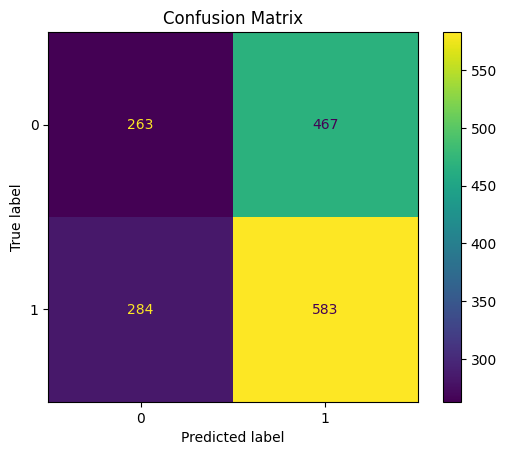

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error,  confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Predict and evaluate the classifier
y_pred = bestclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best KNN Classifier Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()



Optimized the previous predict_game_and_outcome to support 0-tensors faced in evaluating this model. Test the model with an example.

In [ ]:
import numpy as np

def predict_game_and_outcome_optimized(home_players, away_players):
    max_players = 5

    if len(home_players) > max_players or len(away_players) > max_players:
        print("Error: More than 5 players entered on a team.")
        return None, None

    home = np.array([], dtype=float)
    away = np.array([], dtype=float)

    for player in home_players:
        if player not in player_stats:
            print(f"Error: Player {player} not found.")
            return None, None
        home_tensor = np.concatenate((home, findPastThreeIDs(player, None)))

    for player in away_players:
        if player not in player_stats:
            print(f"Error: Player {player} not found.")
            return None, None
        away_tensor = np.concatenate((away, findPastThreeIDs(player, None)))

    home = pad_tensor(home, max_length // 2)
    away = pad_tensor(away, max_length // 2)

    input = np.concatenate((home, away)).reshape(1, -1)

    win_prob = bestclf.predict_proba(input)[0][1]

    scores = bestreg.predict(input)[0]
    home_score, away_score = int(round(scores[0])), int(round(scores[1]))

    return win_prob, (home_score, away_score)

# test
home_team = ["LeBron James", "Anthony Davis", "Russell Westbrook", "Dennis Schroder", "Austin Reaves"]
away_team = ["Stephen Curry", "Klay Thompson", "Draymond Green", "Andrew Wiggins", "Jordan Poole"]

win_prob, scores = predict_game_and_outcome_optimized(home_team, away_team)

if win_prob is not None:
    print(f"Home team win probability: {win_prob:.2f}")
    print(f'Predicted Scores: Home Team {scores[0]} - Away Team {scores[1]}')

    if win_prob > 0.5:
        home_odds = -100 / (win_prob - 1)
        away_odds = 100 / win_prob
    else:
        home_odds = 100 / (1 - win_prob)
        away_odds = -100 / win_prob

    print(f"Implied Odds: Home Team {int(round(home_odds))} - Away Team {int(round(away_odds))}")


Home team win probability: 0.77
Predicted Scores: Home Team 108 - Away Team 102
Implied Odds: Home Team 433 - Away Team 130


Now we use a Neural Networks approach, testing 3 different networks, 2 for classification, 1 for regression. 

The first is a simple CNN for classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Assuming input_tensors and output_labels are prepared as per your provided code
# Ensure you are running this code on a machine with a CUDA-capable GPU

# Define the CNN model
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        
        # Calculate the size of the input to the first fully connected layer
        # After conv1: output size = 960 (same padding)
        # After pool1: output size = 480
        # After conv2: output size = 480 (same padding)
        # After pool2: output size = 240
        self.fc1 = nn.Linear(64 * 240, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor except for the batch dimension
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Make sure labels are of shape (batch_size, 1)

# Split the data into train and test sets
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNClassifier().cuda()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Evaluating the model
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Calculate confusion matrix and other metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
accuracy = accuracy_score(all_labels, all_predictions)
error_rate = 1 - accuracy
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")



Epoch 1/20, Loss: 42.13460729598999
Epoch 2/20, Loss: 42.694831428527834
Epoch 3/20, Loss: 42.69434703826904
Epoch 4/20, Loss: 42.70623462677002
Epoch 5/20, Loss: 42.67439037322998
Epoch 6/20, Loss: 42.69437841415405
Epoch 7/20, Loss: 42.674325141906735
Epoch 8/20, Loss: 42.71014324188232
Epoch 9/20, Loss: 42.69420886993408
Epoch 10/20, Loss: 42.69022159576416
Epoch 11/20, Loss: 42.674291915893555
Epoch 12/20, Loss: 42.67030906677246
Epoch 13/20, Loss: 42.706154594421385
Epoch 14/20, Loss: 42.682279891967774
Epoch 15/20, Loss: 42.71411731719971
Epoch 16/20, Loss: 42.69420314788818
Epoch 17/20, Loss: 42.69420265197754
Epoch 18/20, Loss: 42.698216094970704
Epoch 19/20, Loss: 42.69420335769653
Epoch 20/20, Loss: 42.69022228240967
Confusion Matrix:
[[  0 730]
 [  0 867]]
Accuracy: 54.29%
Error Rate: 45.71%
Precision: 54.29%
Recall: 100.00%
F1-Score: 70.37%


Next is a pretrained ResNet18 Model, also trained for the classification task

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from torchvision import models
from tqdm import tqdm

X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)  
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1) 


X_tensor = X_tensor.view(X_tensor.size(0), 1, 32, 30)

X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class ModifiedResNet(nn.Module):
    def __init__(self):
        super(ModifiedResNet, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.resnet(x)
        x = self.sigmoid(x)
        return x

model = ModifiedResNet().cuda()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(all_labels, all_predictions)
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
error_rate = 1 - accuracy

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


c:\Users\Vishnu\.conda\envs\pytorch_gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Vishnu\.conda\envs\pytorch_gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20, Loss: 0.7163259142637253
Epoch 2/20, Loss: 0.6865190136432647
Epoch 3/20, Loss: 0.6894715464115143
Epoch 4/20, Loss: 0.6886644065380096
Epoch 5/20, Loss: 0.6851206541061401
Epoch 6/20, Loss: 0.6828243291378021
Epoch 7/20, Loss: 0.68423779129982
Epoch 8/20, Loss: 0.6816937863826752
Epoch 9/20, Loss: 0.6817821449041367
Epoch 10/20, Loss: 0.6790513879060746
Epoch 11/20, Loss: 0.6878551524877549
Epoch 12/20, Loss: 0.6871291941404343
Epoch 13/20, Loss: 0.6775893771648407
Epoch 14/20, Loss: 0.6773842042684555
Epoch 15/20, Loss: 0.6762476098537445
Epoch 16/20, Loss: 0.6695623522996903
Epoch 17/20, Loss: 0.6683326196670533
Epoch 18/20, Loss: 0.6629276549816132
Epoch 19/20, Loss: 0.6627953296899796
Epoch 20/20, Loss: 0.661625257730484
Accuracy: 58.67%
Error Rate: 41.33%
Precision: 0.58
Recall: 0.84
F1-Score: 0.69


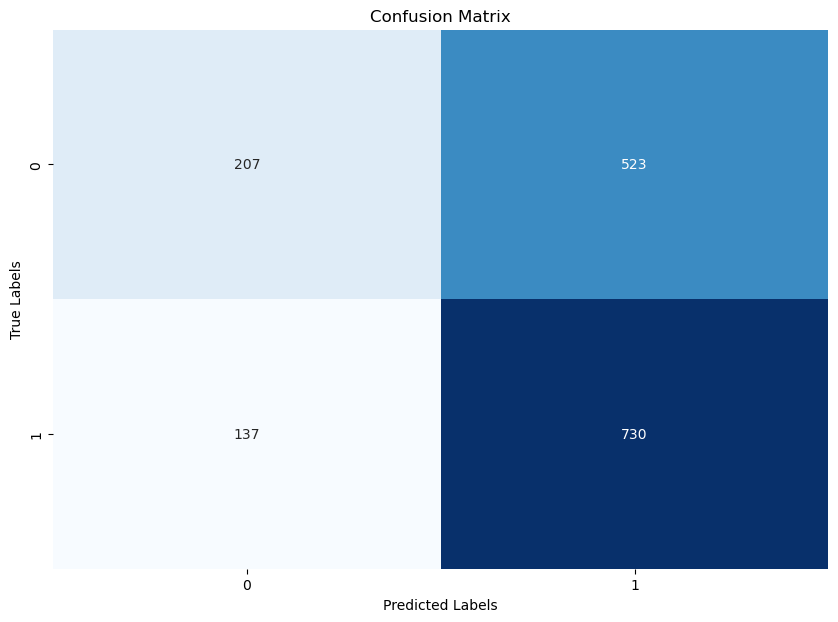

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


The last NN is a pretrained DenseNet121 modified for regression. 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision import models
from tqdm import tqdm

X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
y_scores_tensor = torch.tensor(y_scores, dtype=torch.float32)
X_tensor = X_tensor.view(X_tensor.size(0), 1, 32, 30)

X_train_tensor, X_test_tensor, y_train_scores_tensor, y_test_scores_tensor = train_test_split(X_tensor, y_scores_tensor, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train_tensor, y_train_scores_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_scores_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class ModifiedDenseNetForRegression(nn.Module):
    def __init__(self):
        super(ModifiedDenseNetForRegression, self).__init__()
        self.densenet = models.densenet121(pretrained=True)
        self.densenet.features.conv0 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.densenet.classifier = nn.Linear(self.densenet.classifier.in_features, 2)  # Predicting two scores

    def forward(self, x):
        x = self.densenet(x)
        return x

model = ModifiedDenseNetForRegression().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Evaluating the model
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

print(f"Test Loss: {test_loss/len(test_loader)}")


c:\Users\Vishnu\.conda\envs\pytorch_gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Vishnu\.conda\envs\pytorch_gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20, Loss: 6556.13271484375
Epoch 2/20, Loss: 693.5060087585449
Epoch 3/20, Loss: 172.8507243347168
Epoch 4/20, Loss: 165.7367212677002
Epoch 5/20, Loss: 163.98241104125975
Epoch 6/20, Loss: 162.23789680480957
Epoch 7/20, Loss: 162.42367012023925
Epoch 8/20, Loss: 161.0621901702881
Epoch 9/20, Loss: 161.27172119140624
Epoch 10/20, Loss: 160.7358585357666
Epoch 11/20, Loss: 160.13981521606445
Epoch 12/20, Loss: 159.42718780517578
Epoch 13/20, Loss: 161.2264560699463
Epoch 14/20, Loss: 161.24464729309082
Epoch 15/20, Loss: 160.3187776184082
Epoch 16/20, Loss: 160.7675888824463
Epoch 17/20, Loss: 160.2071733856201
Epoch 18/20, Loss: 160.54353981018068
Epoch 19/20, Loss: 160.72641899108888
Epoch 20/20, Loss: 158.9393125152588
Test Loss: 157.50674041748047


We train a Random Forest Classifier to predict whether the home team will win or lose. This model uses the input tensors to learn patterns in the data.

We train a Random Forest Regressor to predict the scores of the home and away teams. This model helps us estimate the actual game scores based on player performance.

In [37]:
# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, verbose=False)
clf.fit(X_train, y_train)

# Evaluate the classifier on the test data
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Classifier Accuracy: {test_accuracy:.2f}')

# Train Random Forest Regressor
reg = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, verbose=False)
reg.fit(X_train_scores, y_train_scores)

# Evaluate the regressor on the test data
y_test_pred_scores = reg.predict(X_test_scores)
test_mse = mean_squared_error(y_test_scores, y_test_pred_scores)
print(f'Test Regressor Mean Squared Error: {test_mse:.2f}')


Test Classifier Accuracy: 0.59
Test Regressor Mean Squared Error: 150.42


To evaluate the performance of our classifier, we generate a confusion matrix and calculate key metrics such as accuracy, precision, and recall.

<Figure size 1000x700 with 0 Axes>

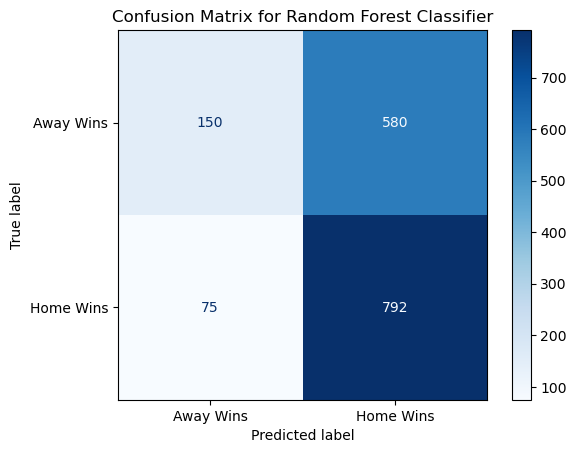

In [38]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Away Wins', 'Home Wins'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [39]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.59
Precision: 0.58
Recall: 0.91


##### Interpretation of Model Evaluation Metrics

After training our models, we evaluated their performance using the test data. Here are the results:

1. **Test Classifier Accuracy: 0.59**
   - The classifier accuracy of 0.59 means that our Random Forest Classifier correctly predicts the outcome of a game (home team win or loss) 59% of the time. In other words, out of 100 games, the model is expected to predict around 59 game outcomes correctly.

   - While this might not seem exceptionally high compared to typical standards in other applications, an accuracy of 59% is quite valuable in the context of sports betting. In gambling, the baseline accuracy for predicting a binary outcome (like win/loss) is 50%, which represents random guessing. An accuracy of 59% indicates that our model performs significantly better than random chance, giving us an edge in making betting decisions. Consistently achieving a 59% win rate can lead to sustainable profits in the long term. In gambling, even a small edge can compound over time, leading to significant gains.

2. **Precision: 0.58**
   - Precision measures the proportion of true positive predictions (correctly predicted home team wins) among all positive predictions (predicted home team wins). In our model, a precision of 0.58 means that 58% of the times our model predicts a home team win, it is correct.

3. **Recall: 0.91**
   - A high recall of 0.91 ensures that our model captures most of the home team wins. This is crucial in betting because missing out on potential wins (false negatives) can mean lost opportunities for profit. By correctly identifying 91% of the actual home team wins, our model ensures that we take advantage of most winning situations.

4. **Test Regressor Mean Squared Error: 150.42**
   - The Mean Squared Error (MSE) of 150.42 for the regressor indicates the average squared difference between the predicted and actual scores. A lower MSE value represents better predictive accuracy, as it means the predicted scores are closer to the actual scores.

   - In practical terms, this MSE value means that on average, the squared error in our score predictions is 150.42 points. This metric helps us understand the precision of our score predictions, and while there is room for improvement, it provides a solid foundation for refining our models.


### Predicting Game Outcomes and Scores Based on User Input

We define a function to predict the outcome and scores of a game based on input player statistics. This function processes the input data, constructs the necessary tensor, and uses the trained models to make predictions.

In [40]:
def predict_game_outcome_and_score(home_team_players, away_team_players):
    home_tensor = np.array([], dtype=float)
    away_tensor = np.array([], dtype=float)
    
    for player in home_team_players:
        home_tensor = np.concatenate((home_tensor, findPastThreeIDs(player, None)))
    
    for player in away_team_players:
        away_tensor = np.concatenate((away_tensor, findPastThreeIDs(player, None)))
    
    home_tensor = pad_tensor(home_tensor, max_length // 2)
    away_tensor = pad_tensor(away_tensor, max_length // 2)
    
    input_tensor = np.concatenate((home_tensor, away_tensor)).reshape(1, -1)
    
    scores = reg.predict(input_tensor)[0]
    home_team_score, away_team_score = int(round(scores[0])), int(round(scores[1]))
    
    # Determine the outcome based on predicted scores
    outcome = 1 if home_team_score > away_team_score else 0
    
    return outcome, (home_team_score, away_team_score)

We handle user input for home and away team players and use our prediction function to determine the game outcome and scores. This allows users to input any combination of players and see the predicted results.

In [41]:
def predict_game_outcome_and_score(home_team_players, away_team_players):
    max_players = 5  # Maximum number of players in the team
    
    if len(home_team_players) > max_players or len(away_team_players) > max_players:
        print("Error: More than 5 players entered on a team.")
        return None, None
    
    home_tensor = np.array([], dtype=float)
    away_tensor = np.array([], dtype=float)
    
    for player in home_team_players:
        if player not in player_stats:
            print(f"Error: Player {player} not found.")
            return None, None
        home_tensor = np.concatenate((home_tensor, findPastThreeIDs(player, None)))
    
    for player in away_team_players:
        if player not in player_stats:
            print(f"Error: Player {player} not found.")
            return None, None
        away_tensor = np.concatenate((away_tensor, findPastThreeIDs(player, None)))
    
    # Add empty tensors if less than five players are inputted
    while len(home_team_players) < max_players:
        home_tensor = np.concatenate((home_tensor, np.zeros(20 * 3)))
        home_team_players.append(None)  # To keep track of added empty tensors
    
    while len(away_team_players) < max_players:
        away_tensor = np.concatenate((away_tensor, np.zeros(20 * 3)))
        away_team_players.append(None)  # To keep track of added empty tensors
    
    home_tensor = pad_tensor(home_tensor, max_length // 2)
    away_tensor = pad_tensor(away_tensor, max_length // 2)
    
    input_tensor = np.concatenate((home_tensor, away_tensor)).reshape(1, -1)
    
    scores = reg.predict(input_tensor)[0]
    home_team_score, away_team_score = int(round(scores[0])), int(round(scores[1]))
    
    # Determine the outcome based on predicted scores
    outcome = 1 if home_team_score > away_team_score else 0
    
    return outcome, (home_team_score, away_team_score)

# User input for home and away team players
home_team_input = input("Enter the names of the home team players separated by commas: ").split(',')
away_team_input = input("Enter the names of the away team players separated by commas: ").split(',')

# Strip any leading/trailing spaces
home_team_input = [player.strip() for player in home_team_input]
away_team_input = [player.strip() for player in away_team_input]

# Predict outcome and scores
outcome, scores = predict_game_outcome_and_score(home_team_input, away_team_input)

if outcome is not None:
    print(f'Predicted Outcome: {"Home Team Wins" if outcome == 1 else "Away Team Wins"}')
    print(f'Predicted Scores: Home Team {scores[0]} - Away Team {scores[1]}')
    
# For example, you can input this in the popup that comes when you run this cell:
# Bojan Bogdanovic, Austin Rivers, Mason Plumlee, Andre Drummond, Cedi Osman
# Kevon Harris, Terry Rozier, Udonis Haslem, Kelly Olynyk, Devin Booker

Predicted Outcome: Home Team Wins
Predicted Scores: Home Team 108 - Away Team 105
